In [1]:
import pandas as pd
import codecs
import numpy as np
import math
import csv
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score, precision_score # New
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy import signal
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pylab as plt
import matplotlib.dates as mdates
import math

In [2]:
data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2020.csv'
data_source1 = pd.read_csv(data_path)
dat_source1 = pd.DataFrame(data_source1)
#dat_source1 = dat_source1.iloc[:-3,:]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2021.csv'
data_source2 = pd.read_csv(data_path)
dat_source2 = pd.DataFrame(data_source2)
dat_source2 = dat_source2.iloc[:8761,:9]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2022.csv'
data_source3 = pd.read_csv(data_path)
dat_source3 = pd.DataFrame(data_source3)
dat_source3 = dat_source3.iloc[:8760,:9]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2023.csv'
data_source4 = pd.read_csv(data_path)
dat_source4 = pd.DataFrame(data_source4)
dat_source4 = dat_source4.iloc[:8760,:9]

dat_arr1 = np.array(dat_source1)
dat_arr2 = np.array(dat_source2)
dat_arr3 = np.array(dat_source3)
dat_arr4 = np.array(dat_source4)

dat_arr = np.concatenate([dat_arr1, dat_arr2, dat_arr3, dat_arr4],axis=0)
dat_arr.shape # 8784, 8761, 8760, 8760

dat_source = pd.DataFrame(dat_arr, columns=['Time-Date stamp','Date','ERCOT Load','Total Wind Output','Total Wind Installed','Wind Output, % of Load','Wind Output, % of Installed','1-hr MW change','1-hr % change'])

dat = pd.DataFrame()
dat['Timestamp'] = np.array(dat_source['Time-Date stamp'].iloc[1:])
dat['MW % change'] = np.array(dat_source.iloc[1:,3], dtype=float)-np.array(dat_source.iloc[0:-1,3], dtype=float)
dat['MW % change'] = np.divide(np.array(dat['MW % change']),np.array(dat_source.iloc[1:,4]))*100
dat['Total Wind Output'] = np.divide(np.array(dat_source.iloc[1:,3]), np.array(dat_source.iloc[1:,4]))

ramp_ratio = 20
load_ratio = 10
year_arr = np.concatenate([np.ones(8784)*2020, np.ones(8760)*2021, np.ones(8760)*2022, np.ones(8760)*2023])
year_df = pd.DataFrame(year_arr, columns=['Year'], dtype=int)
wind_df = pd.concat([year_df, dat], axis=1)

wind_df = wind_df.reset_index(drop=True)

std_scaler = sklearn.preprocessing.MinMaxScaler()
std_scaler_load = sklearn.preprocessing.MinMaxScaler()
std_scaler_ramp = sklearn.preprocessing.MinMaxScaler()

wind_df[['Total Wind Output']] = std_scaler.fit_transform(wind_df[['Total Wind Output']])
wind_df[['MW % change']] = std_scaler_ramp.fit_transform(wind_df[['MW % change']])

In [3]:
data_path = 'C:/Users/smartgrid_AI/Documents/kms/windpower_ramprate/Combined_training_result_df.csv'
data_source = pd.read_csv(data_path)
dat_source = pd.DataFrame(data_source)
dat_source = dat_source.iloc[:,1:]
dat_source['Generation Error'] = np.array(dat_source[['Real Generation']])-np.array(dat_source[['Predicted Generation']])
#dat_source['Ramp Error'] = np.array(dat_source[['Real Ramp']])-np.array(dat_source[['Predicted Ramp']])

dat_source

,Predicted Generation,Real Generation,Predicted Ramp,Real Ramp,Generation Error
0,0.599368,0.593079,-1.165505,-1.794430,-0.006289
1,0.566768,0.564236,-3.260029,-2.884298,-0.002532
2,0.549180,0.550182,-1.758769,-1.405453,0.001001
3,0.549626,0.541778,0.044534,-0.840336,-0.007847
4,0.523511,0.512642,-2.611463,-2.913655,-0.010869
...,...,...,...,...,...
749107,0.370860,0.363335,-1.513485,-2.502920,-0.007525
749108,0.367847,0.354841,-0.301263,-0.849347,-0.013006
749109,0.314876,0.301810,-5.297110,-5.303111,-0.013066
749110,0.249479,0.241135,-6.539671,-6.067523,-0.008344


In [4]:
dat_source = dat_source.reset_index(drop=True)

dat_source[['Real Ramp']] = std_scaler_ramp.transform(dat_source[['Real Ramp']])
dat_source[['Predicted Ramp']] = std_scaler_ramp.transform(dat_source[['Predicted Ramp']])
dat_source['Ramp Error'] = np.array(dat_source[['Predicted Ramp']])-np.array(dat_source[['Real Ramp']])

dat_source

,Predicted Generation,Real Generation,Predicted Ramp,Real Ramp,Generation Error,Ramp Error
0,0.599368,0.593079,0.477633,0.458694,-0.006289,0.018939
1,0.566768,0.564236,0.414561,0.425875,-0.002532,-0.011314
2,0.549180,0.550182,0.459768,0.470408,0.001001,-0.010639
3,0.549626,0.541778,0.514071,0.487425,-0.007847,0.026646
4,0.523511,0.512642,0.434091,0.424991,-0.010869,0.009100
...,...,...,...,...,...,...
749107,0.370860,0.363335,0.467155,0.437360,-0.007525,0.029795
749108,0.367847,0.354841,0.503658,0.487154,-0.013006,0.016504
749109,0.314876,0.301810,0.353218,0.353038,-0.013066,0.000181
749110,0.249479,0.241135,0.315801,0.330019,-0.008344,-0.014218


In [5]:
pred = np.array(dat_source[['Predicted Generation']])
rpred = np.array(dat_source[['Predicted Ramp']])
distance = np.sqrt(np.square(pred-np.mean(pred))+np.square(rpred-np.mean(rpred)))
dat_source['distance'] = distance

times = np.zeros(dat_source.shape[0], dtype=int)
for i in range(times.shape[0]):
    times[i] = int(i%24)

dat_source['time'] = times

dat_source

,Predicted Generation,Real Generation,Predicted Ramp,Real Ramp,Generation Error,Ramp Error,distance,time
0,0.599368,0.593079,0.477633,0.458694,-0.006289,0.018939,0.257894,0
1,0.566768,0.564236,0.414561,0.425875,-0.002532,-0.011314,0.243431,1
2,0.549180,0.550182,0.459768,0.470408,0.001001,-0.010639,0.211976,2
3,0.549626,0.541778,0.514071,0.487425,-0.007847,0.026646,0.205822,3
4,0.523511,0.512642,0.434091,0.424991,-0.010869,0.009100,0.195973,4
...,...,...,...,...,...,...,...,...
749107,0.370860,0.363335,0.467155,0.437360,-0.007525,0.029795,0.052610,19
749108,0.367847,0.354841,0.503658,0.487154,-0.013006,0.016504,0.025535,20
749109,0.314876,0.301810,0.353218,0.353038,-0.013066,0.000181,0.161672,21
749110,0.249479,0.241135,0.315801,0.330019,-0.008344,-0.014218,0.217951,22


In [6]:
data_path = 'C:/Users/smartgrid_AI/Documents/kms/windpower_ramprate/Combined_result_df.csv'
test_source = pd.read_csv(data_path)
test_source = pd.DataFrame(test_source)
test_source = test_source.iloc[:,1:]

test_source['Generation Error'] = np.array(test_source[['Real Generation']])-np.array(test_source[['Predicted Generation']])
test_source

,Predicted Generation,Real Generation,Predicted Ramp,Real Ramp,Generation Error
0,0.361006,0.352665,2.904399,2.070283,-0.008341
1,0.394062,0.387860,3.305594,3.519482,-0.006202
2,0.433283,0.427620,3.922059,3.976006,-0.005663
3,0.453140,0.455675,1.985712,2.805500,0.002535
4,0.411559,0.425549,-4.158111,-3.012528,0.013991
...,...,...,...,...,...
79603,0.172693,0.224535,1.495784,0.906008,0.051842
79604,0.191929,0.237918,1.923602,1.338303,0.045989
79605,0.204588,0.260646,1.265881,2.272786,0.056058
79606,0.199369,0.283270,-0.521911,2.262432,0.083901


In [7]:
test_source = test_source.reset_index(drop=True)

test_source[['Real Ramp']] = std_scaler_ramp.transform(test_source[['Real Ramp']])
test_source[['Predicted Ramp']] = std_scaler_ramp.transform(test_source[['Predicted Ramp']])
test_source['Ramp Error'] = np.array(test_source[['Predicted Ramp']])-np.array(test_source[['Real Ramp']])

test_source

,Predicted Generation,Real Generation,Predicted Ramp,Real Ramp,Generation Error,Ramp Error
0,0.361006,0.352665,0.600190,0.575072,-0.008341,0.025118
1,0.394062,0.387860,0.612271,0.618712,-0.006202,-0.006441
2,0.433283,0.427620,0.630835,0.632459,-0.005663,-0.001624
3,0.453140,0.455675,0.572526,0.597212,0.002535,-0.024686
4,0.411559,0.425549,0.387517,0.422014,0.013991,-0.034497
...,...,...,...,...,...,...
79603,0.172693,0.224535,0.557772,0.540013,0.051842,0.017760
79604,0.191929,0.237918,0.570655,0.553030,0.045989,0.017625
79605,0.204588,0.260646,0.550849,0.581170,0.056058,-0.030321
79606,0.199369,0.283270,0.497014,0.580858,0.083901,-0.083845


In [8]:
pred = np.array(test_source[['Predicted Generation']])
rpred = np.array(test_source[['Predicted Ramp']])
distance = np.sqrt(np.square(pred-np.mean(pred))+np.square(rpred-np.mean(rpred)))
test_source['distance'] = distance

times = np.zeros(test_source.shape[0], dtype=int)
for i in range(times.shape[0]):
    times[i] = int(i%24)

test_source['time'] = times


test_source

,Predicted Generation,Real Generation,Predicted Ramp,Real Ramp,Generation Error,Ramp Error,distance,time
0,0.361006,0.352665,0.600190,0.575072,-0.008341,0.025118,0.128934,0
1,0.394062,0.387860,0.612271,0.618712,-0.006202,-0.006441,0.161532,1
2,0.433283,0.427620,0.630835,0.632459,-0.005663,-0.001624,0.203846,2
3,0.453140,0.455675,0.572526,0.597212,0.002535,-0.024686,0.193989,3
4,0.411559,0.425549,0.387517,0.422014,0.013991,-0.034497,0.186669,4
...,...,...,...,...,...,...,...,...
79603,0.172693,0.224535,0.557772,0.540013,0.051842,0.017760,0.108697,19
79604,0.191929,0.237918,0.570655,0.553030,0.045989,0.017625,0.099347,20
79605,0.204588,0.260646,0.550849,0.581170,0.056058,-0.030321,0.077512,21
79606,0.199369,0.283270,0.497014,0.580858,0.083901,-0.083845,0.071487,22


In [36]:
test_source.to_csv('Combined_result_final.csv')

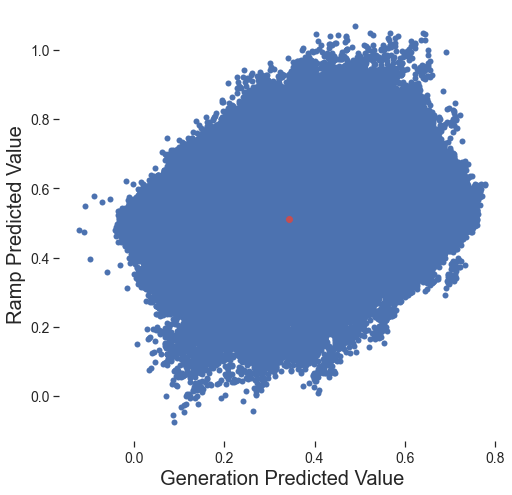

In [9]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(8, 8))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(data=dat_source, x="Predicted Generation", y="Predicted Ramp", palette="ch:r=-.2,d=.3_r",linewidth=0, ax=ax)
plt.plot(np.mean(dat_source['Predicted Generation']),np.mean(dat_source['Predicted Ramp']),'-ro')
plt.xlabel('Generation Predicted Value', fontsize=20)
plt.ylabel('Ramp Predicted Value', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()
f.savefig('GenPredict_vs_RampPredict.png', dpi=1000, bbox_inches="tight")

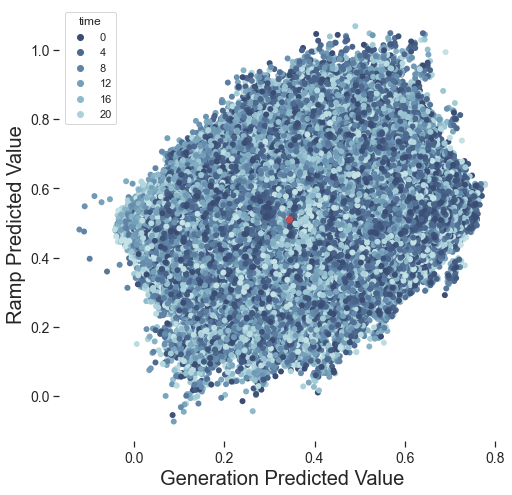

In [15]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(8, 8))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(data=dat_source, x="Predicted Generation", y="Predicted Ramp", palette="ch:r=-.2,d=.3_r", hue='time',linewidth=0, ax=ax)
plt.plot(np.mean(dat_source['Predicted Generation']),np.mean(dat_source['Predicted Ramp']),'-ro')
plt.xlabel('Generation Predicted Value', fontsize=20)
plt.ylabel('Ramp Predicted Value', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()
f.savefig('GenPredict_vs_RampPredict_withtime.png', dpi=1000, bbox_inches="tight")

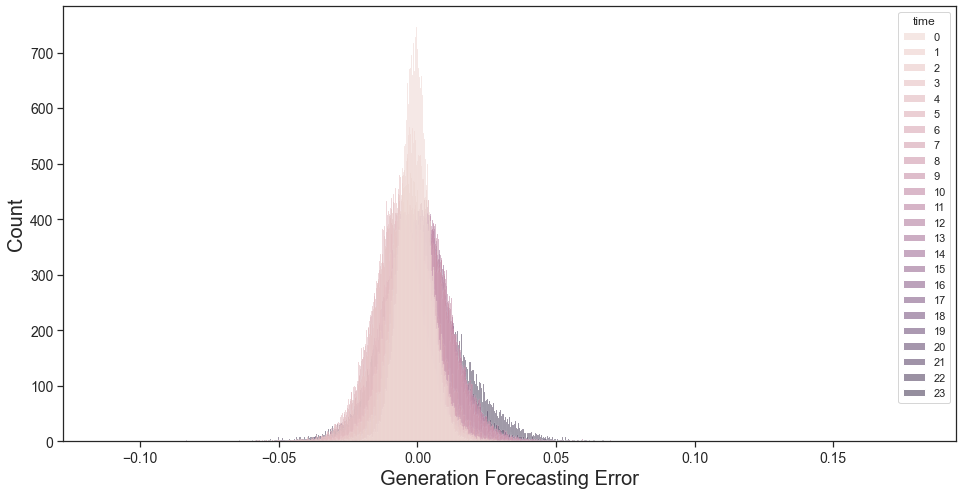

In [16]:
f, ax = plt.subplots(figsize=(16, 8))
sns.histplot(data=dat_source, x="Generation Error", hue="time")
plt.xlabel('Generation Forecasting Error', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
f.savefig('Forecasting_Error_histogram.png', dpi=1000, bbox_inches="tight")

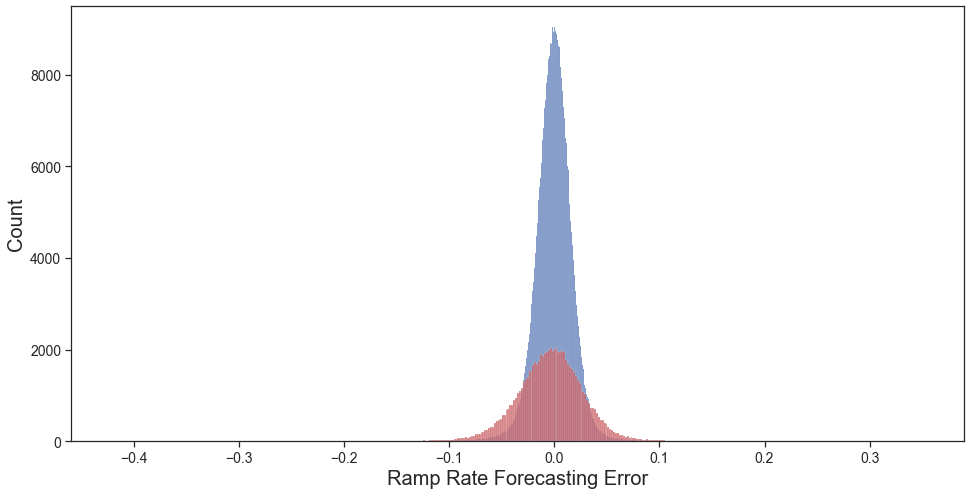

In [17]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(16, 8))
sns.histplot(data=dat_source, x="Ramp Error",color='b')
sns.histplot(data=test_source, x="Ramp Error",color='r')
plt.xlabel('Ramp Rate Forecasting Error', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
#f.savefig('Ramp_Forecasting_Error_histogram.png', dpi=1000, bbox_inches="tight")

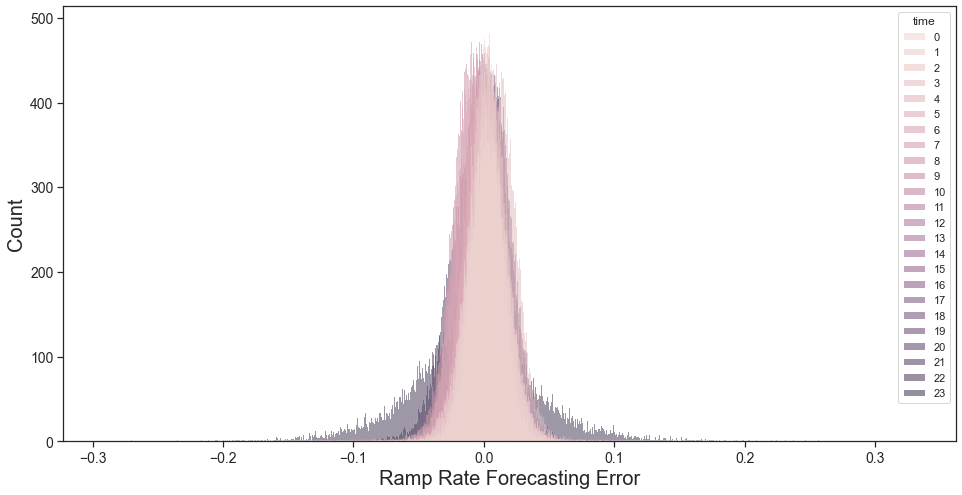

In [18]:
f, ax = plt.subplots(figsize=(16, 8))
sns.histplot(data=dat_source, x="Ramp Error", hue="time")
plt.xlabel('Ramp Rate Forecasting Error', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
f.savefig('Ramp_Forecasting_Error_histogram.png', dpi=1000, bbox_inches="tight")

In [11]:
from scipy.optimize import minimize_scalar
from scipy.stats import laplace, norm
import math

from scipy.stats import rv_continuous
import scipy

def dist_num(a, b, max_dist):
    x = np.sqrt(np.square(a-np.mean(pred))+np.square(b-np.mean(rpred)))
    if x<max_dist/6:
        num = 0
    elif x<max_dist/6*2:
        num = 1
    elif x<max_dist/6*3:
        num = 2
    elif x<max_dist/6*4:
        num = 3
    elif x<max_dist/6*5:
        num = 4
    else:
        num = 5
    return num

def dist_group(dat, dnum, max_dist):
    if dnum==0:
        X = dat.loc[dat.distance<max_dist/6, :]
    elif dnum==1:
        X = dat.loc[(max_dist/6<dat.distance) & (dat.distance<max_dist*2/6), :]
    elif dnum==2:
        X = dat.loc[(max_dist*2/6<dat.distance) & (dat.distance<max_dist*3/6), :]
    elif dnum==3:
        X = dat.loc[(max_dist*3/6<dat.distance) & (dat.distance<max_dist*4/6), :]
    elif dnum==4:
        X = dat.loc[(max_dist*4/6<dat.distance) & (dat.distance<max_dist*5/6), :]
    else:
        X = dat.loc[max_dist*5/6<dat.distance, :]
    return X

def pred_group_num(x, dat):
    vmax, vmin = max(dat['Predicted Generation']), min(dat['Predicted Generation'])
    
    if x<(vmin+(vmax-vmin)/5*1):
        num = 0
    elif x<(vmin+(vmax-vmin)/5*2):
        num = 1
    elif x<(vmin+(vmax-vmin)/5*3):
        num =2
    elif x<(vmin+(vmax-vmin)/5*4):
        num = 3
    else:
        num = 4
    #elif x<(vmin+(vmax-vmin)/6*5):
    #    num = 4
    #else:
    #    num = 5
    return num

def ramppred_group_num(x, dat):
    vmax, vmin = max(dat['Predicted Ramp']), min(dat['Predicted Ramp'])
    
    if x<(vmin+(vmax-vmin)/5*1):
        num = 0
    elif x<(vmin+(vmax-vmin)/5*2):
        num = 1
    elif x<(vmin+(vmax-vmin)/5*3):
        num = 2
    elif x<(vmin+(vmax-vmin)/5*4):
        num = 3
    else:
        num = 4
    return num

def pred_group(dat, gnum):
    vmax, vmin = max(dat['Predicted Generation']), min(dat['Predicted Generation'])
    
    if gnum==0:
        X = dat.loc[dat['Predicted Generation']<vmin+(vmax-vmin)/5*1, :]
    elif gnum==1:
        X = dat.loc[(vmin+(vmax-vmin)/5*1<dat['Predicted Generation']) & (dat['Predicted Generation']<vmin+(vmax-vmin)/5*2), :]
    elif gnum==2:
        X = dat.loc[(vmin+(vmax-vmin)/5*2<dat['Predicted Generation']) & (dat['Predicted Generation']<vmin+(vmax-vmin)/5*3), :]
    elif gnum==3:
        X = dat.loc[(vmin+(vmax-vmin)/5*3<dat['Predicted Generation']) & (dat['Predicted Generation']<vmin+(vmax-vmin)/5*4), :]
    else:
        X = dat.loc[vmin+(vmax-vmin)/5*4<dat['Predicted Generation'], :]
        
    #elif gnum==4:
    #    X = dat.loc[(vmin+(vmax-vmin)/6*4<dat.Predicted_Value) & (dat.Predicted_Value<vmin+(vmax-vmin)/6*5), :]
    #else:
    #    X = dat.loc[vmin+(vmax-vmin)/6*5<dat.Predicted_Value, :]
    return X

def ramppred_group(dat, gnum):
    vmax, vmin = max(dat['Predicted Ramp']), min(dat['Predicted Ramp'])
    
    if gnum==0:
        X = dat.loc[dat['Predicted Ramp']<vmin+(vmax-vmin)/5*1, :]
    elif gnum==1:
        X = dat.loc[(vmin+(vmax-vmin)/5*1<dat['Predicted Ramp']) & (dat['Predicted Ramp']<vmin+(vmax-vmin)/5*2), :]
    elif gnum==2:
        X = dat.loc[(vmin+(vmax-vmin)/5*2<dat['Predicted Ramp']) & (dat['Predicted Ramp']<vmin+(vmax-vmin)/5*3), :]
    elif gnum==3:
        X = dat.loc[(vmin+(vmax-vmin)/5*3<dat['Predicted Ramp']) & (dat['Predicted Ramp']<vmin+(vmax-vmin)/5*4), :]
    else:
        X = dat.loc[vmin+(vmax-vmin)/5*4<dat['Predicted Ramp'], :]
    return X

def compute_bound(lrb0, lrb1, lrb2, lrmu0, lrmu1, lrmu2):
    if (lrb1==0 or np.isnan(lrb1)) and (lrb2==0 or np.isnan(lrb2)):
        rf = 1/lrb0*np.exp(-(k2-lrmu0)/lrb0)
    else:
        if lrb1==0 or np.isnan(lrb1):
            rf = 1/lrb2*np.exp(-(k2-lrmu2)/lrb2)
        elif lrb2==0 or np.isnan(lrb2):
            rf = 1/lrb1*np.exp(-(k2-lrmu1)/lrb1)
        else:
            rK = lrb0/(2*lrb1*lrb2)
            ralpha = -1/lrb1-1/lrb2+1/lrb0
            rbeta = lrmu1/lrb1+lrmu2/lrb2-lrmu0/lrb0
            rf = rK/ralpha*np.exp(ralpha*k2+rbeta)
    return rf

def extract_groups(i, d_source):
    x = test_source.loc[i,'Predicted Generation']
    y = test_source.loc[i,'Predicted Ramp']    
    
    #maxdist = max(d_source.distance)
    #dnum = dist_num(x, y, maxdist)
    #inter_X = dist_group(d_source, dnum, maxdist)
    #N = inter_X.shape[0]

    gnum = pred_group_num(x, d_source)
    rnum = ramppred_group_num(y, d_source)
    p_group = pred_group(d_source, gnum)
    rp_group = ramppred_group(d_source, rnum)
    
    return p_group, rp_group

In [12]:
ubs = np.zeros((test_source.shape[0], 3))
lbs = np.zeros((test_source.shape[0], 3))

for i in range(1):
#for i in range(10):
    clock = int(i%24)
    d_source = dat_source.loc[dat_source.time==clock,:]
    lrmu0, lrb0 = laplace.fit(d_source['Ramp Error'])
    
    p_group, rp_group = extract_groups(i, d_source)

    ### Ramp Boundary Calculation ###
    lrmu1, lrb1 = laplace.fit(p_group['Ramp Error'])
    lrmu2, lrb2 = laplace.fit(rp_group['Ramp Error'])

    K = lrb0/(2*lrb1*lrb2)
    beta = -1/lrb1-1/lrb2+1/lrb0
    gamma = lrmu1/lrb1+lrmu2/lrb2-lrmu0/lrb0
    
    alpha995 = 0.005
    alpha99 = 0.01
    alpha95 = 0.05
    
    x995 = (np.log(-alpha995*beta/(2*K))-gamma)/beta
    x99 = (np.log(-alpha99*beta/(2*K))-gamma)/beta
    x95 = (np.log(-alpha95*beta/(2*K))-gamma)/beta
    
    y995 = (-np.log(alpha995*beta/(2*K))-gamma)/beta
    y99 = (-np.log(alpha99*beta/(2*K))-gamma)/beta
    y95 = (-np.log(alpha95*beta/(2*K))-gamma)/beta
    
    ubs[i,:] = np.array((x995, x99, x95))
    lbs[i,:] = np.array((y995, y99, y95))
    
    narr = pd.DataFrame(np.repeat(np.array(test_source.loc[i]).reshape(1,-1), 10, axis=0), columns=dat_source.columns)
    dat_source = pd.concat([dat_source, narr], axis=0)
    dat_source = dat_source.reset_index(drop=True)
    dat_source['time'] = np.array(dat_source['time'], dtype=int)

    #dat_source = pd.concat([dat_source, test_source.loc[i]], axis=0)
    
    if i%10000 == 0:
        print(str(i)+"th confidence interval is calculated.")

0th confidence interval is calculated.


In [13]:
inter_X = d_source

In [14]:
x1 = np.arange(min(inter_X['Ramp Error']), max(inter_X['Ramp Error']), 1/dat_source.shape[0])
x2 = np.arange(min(inter_X['Ramp Error']), max(inter_X['Ramp Error']), 1/dat_source.shape[0])
lap1 = laplace.pdf(x1, loc=lrmu1, scale=lrb1)
lap2 = laplace.pdf(x2, loc=lrmu2, scale=lrb1)

In [15]:
x0 = np.arange(min(d_source['Ramp Error']), max(d_source['Ramp Error']), 1/dat_source.shape[0])
#lrmu0, lrb0 = laplace.fit(d_source.Ramp_Forecasting_Error)
lap0 = laplace.pdf(x0, lrmu0, lrb0)

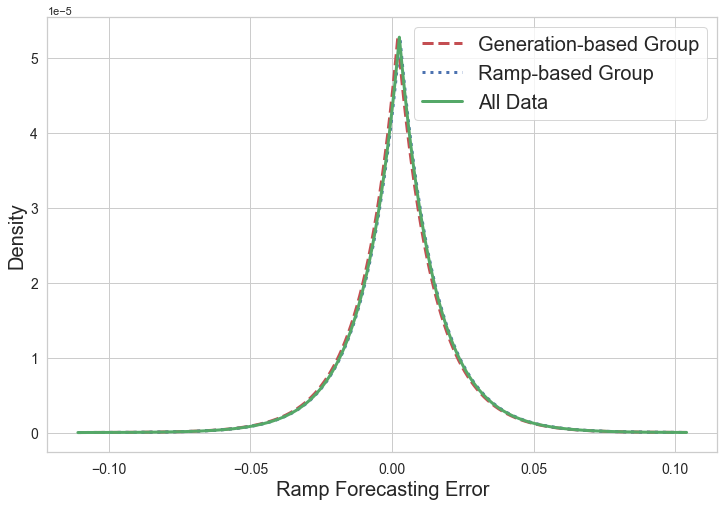

In [16]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 8))
#sns.histplot(data=p_group, x="Ramp_Forecasting_Error", bins=100)
#sns.histplot(data=rp_group, x="Ramp_Forecasting_Error", bins=100, color = 'red')

plt.plot(x1, lap1/dat_source.shape[0], linewidth=3, color='r', linestyle='dashed')
plt.plot(x2, lap2/dat_source.shape[0], linewidth=3, color='b', linestyle='dotted')
plt.plot(x0, lap0/dat_source.shape[0], linewidth=3, color='g')

plt.xlabel('Ramp Forecasting Error', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(labels=['Generation-based Group', 'Ramp-based Group', 'All Data'], loc="upper right", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
#f.savefig('Laplace_pdfs.png', dpi=1000, bbox_inches="tight")

In [17]:
k = np.arange(min(dat_source['Ramp Error']), max(dat_source['Ramp Error']), 1/dat_source.shape[0])
kk = np.arange(0.02, max(dat_source['Ramp Error']), 1/dat_source.shape[0])

In [19]:
rK = lrb0/(2*lrb1*lrb2)
ralpha = -1/lrb1-1/lrb2+1/lrb0
rbeta = lrmu1/lrb1+lrmu2/lrb2-lrmu0/lrb0
rf = rK/ralpha*np.exp(ralpha*k+rbeta)

c_pdf = rK*np.exp(-abs(k-lrmu1)/lrb1-abs(k-lrmu2)/lrb2+abs(k-lrmu0)/lrb0)
c_cdf = rK/ralpha*np.exp(ralpha*kk+rbeta)

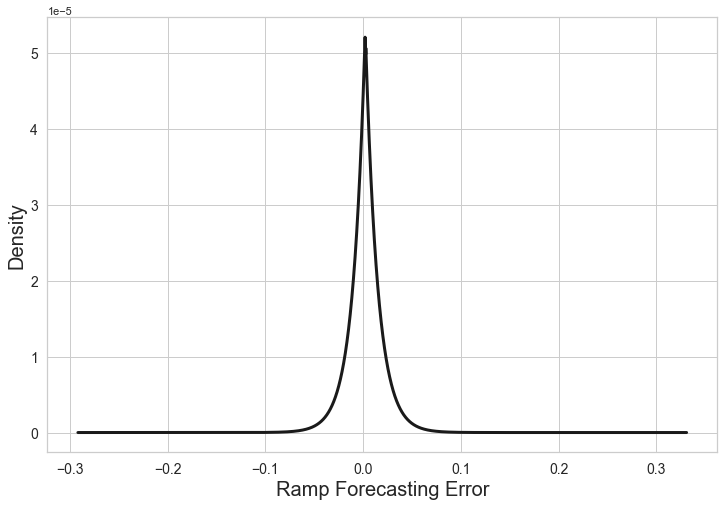

In [20]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 8))
#sns.histplot(data=p_group, x="Ramp_Forecasting_Error", bins=100)
#sns.histplot(data=rp_group, x="Ramp_Forecasting_Error", bins=100, color = 'red')

plt.plot(k, c_pdf/dat_source.shape[0], linewidth=3, color='k')

plt.xlabel('Ramp Forecasting Error', fontsize=20)
plt.ylabel('Density', fontsize=20)
#plt.legend(labels=['Generation-based Group', 'Ramp-based Group', 'All Data'], loc="upper left", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
#f.savefig('Laplace_joint_pdf.png', dpi=1000, bbox_inches="tight")

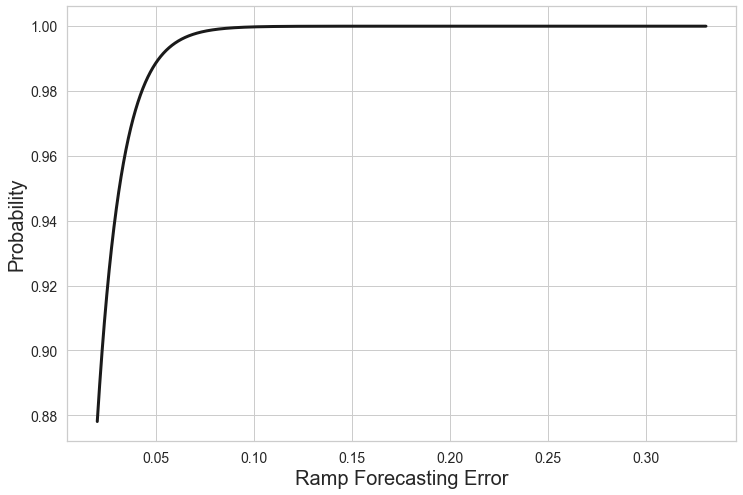

In [21]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 8))
#sns.histplot(data=p_group, x="Ramp_Forecasting_Error", bins=100)
#sns.histplot(data=rp_group, x="Ramp_Forecasting_Error", bins=100, color = 'red')

plt.plot(kk, 1+c_cdf, linewidth=3, color='k')
plt.xlabel('Ramp Forecasting Error', fontsize=20)
plt.ylabel('Probability', fontsize=20)
#plt.legend(labels=['Generation-based Group', 'Ramp-based Group', 'All Data'], loc="upper left", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
#f.savefig('Laplace_cdf.png', dpi=1000, bbox_inches="tight")